In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

[0] Downloading 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv' ...
Saving 'moore.csv'
HTTP response 200  [https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv]


In [2]:
# load data from file moore.csv as a pandas dataframe
data = pd.read_csv('moore.csv')

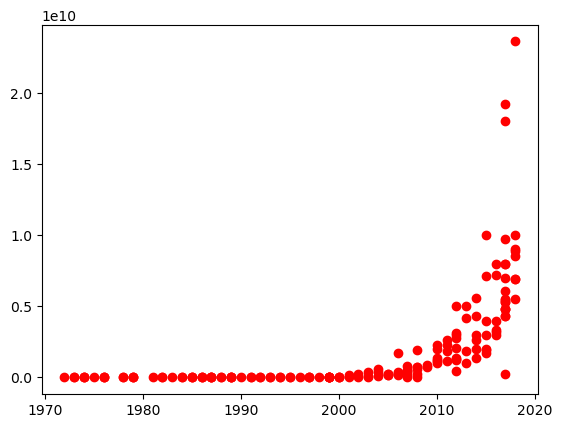

In [3]:
#plot a graph where X is the first column and Y is the second column of a dataframe
X = data.values[:,0].reshape(-1,1) #makes it a 2D array of size NxD where D=1
Y = data.values[:,1].reshape(-1,1) 
plt.plot(X, Y, 'ro')
plt.show()

In [4]:
# because we want a linear model, we should take the log of Y
Y = np.log(Y)

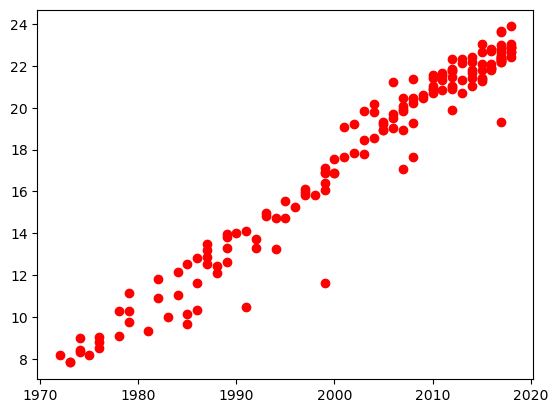

In [5]:
# plot X Y graph, and now it's ready for linear regression
plt.plot(X, Y, 'ro')
plt.show()

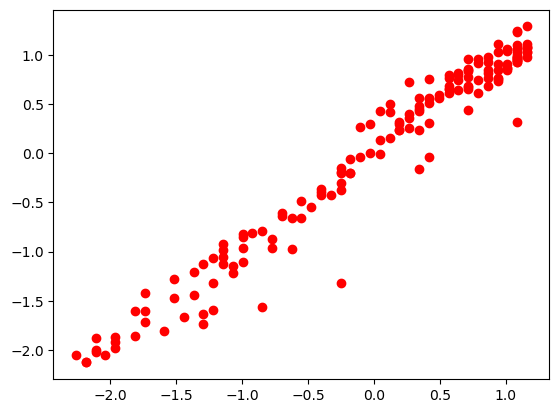

In [6]:
#Preprocessing to make sure X and Y are normalized
mx = X.mean()
sx = X.std()
# Y mean
ym = Y.mean()
sy = Y.std()
# use the previous values to scale and center both X and Y
X = (X - mx) / sx
Y = (Y - ym) / sy
# plot X and Y
plt.plot(X, Y, 'ro')
plt.show()


In [7]:
# create linear model in pytorch
model = torch.nn.Linear(1, 1)
# use sgd optimizer and mse loss functions
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = torch.nn.MSELoss()
# create inputs from X and targets from Y
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))
type(inputs)

torch.Tensor

In [8]:
# main training loop with 100 epochs
n_epochs = 100
losses = []
for epoch in range(n_epochs):
    #zero the parameter gradients in the optimizer
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = loss_fn(outputs, targets)
    losses.append(loss.item())

    # Backward pass
    loss.backward()

    # Update the parameters
    optimizer.step()

    print("Epoch {}/{}; loss={}".format(epoch + 1, n_epochs, loss.item()))

Epoch 1/100; loss=0.33904698491096497
Epoch 2/100; loss=0.2311936914920807
Epoch 3/100; loss=0.16216760873794556
Epoch 4/100; loss=0.11799091100692749
Epoch 5/100; loss=0.0897178128361702
Epoch 6/100; loss=0.07162304222583771
Epoch 7/100; loss=0.060042381286621094
Epoch 8/100; loss=0.05263076350092888
Epoch 9/100; loss=0.04788732901215553
Epoch 10/100; loss=0.044851526618003845
Epoch 11/100; loss=0.042908620089292526
Epoch 12/100; loss=0.04166514798998833
Epoch 13/100; loss=0.0408693328499794
Epoch 14/100; loss=0.04036001116037369
Epoch 15/100; loss=0.04003404453396797
Epoch 16/100; loss=0.039825428277254105
Epoch 17/100; loss=0.03969191014766693
Epoch 18/100; loss=0.03960646316409111
Epoch 19/100; loss=0.03955177217721939
Epoch 20/100; loss=0.03951676934957504
Epoch 21/100; loss=0.03949437290430069
Epoch 22/100; loss=0.03948003798723221
Epoch 23/100; loss=0.0394708551466465
Epoch 24/100; loss=0.03946499153971672
Epoch 25/100; loss=0.039461228996515274
Epoch 26/100; loss=0.039458829909

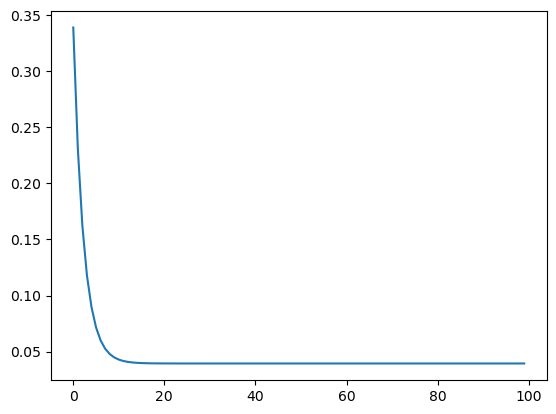

In [9]:
# plot the losses
plt.plot(losses, label='loss')

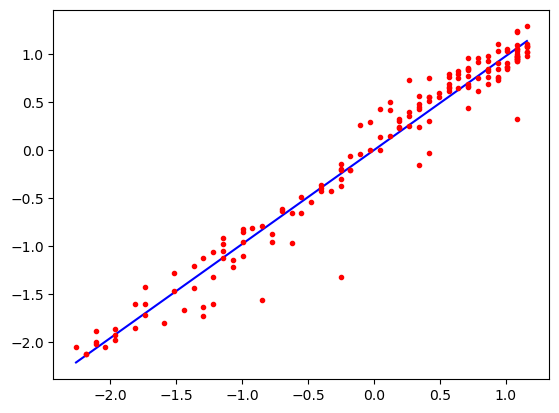

In [13]:
#use the pytorch model to make predictions for the values of X
predictions = model(torch.from_numpy(X.astype(np.float32))).detach().numpy()
#plot the line of predictions in blue
plt.plot(X, predictions, 'b-', label='predicted')
#plot the original data in red
plt.plot(X, Y, 'r.', label='original')
plt.show()

In [17]:
#show weights of the model
A = model.weight.data.numpy()[0,0]
A

0.9800743

# Theory

We've assumed that the model follows a curve in the form
$$
y = C_0*r^t 
$$

In order to apply linear regression, we took the log of both sides to get
$$
log(y) = t*log(r) + log(C_0)
$$

In order to applyWe then regularized the values as shown in:
$$
Y' = (Y - ym) / sy
X' = (X - mx) / sx
$$

So we could then find the parameters A and B for the line (wouldn't work without regularization):
$$
Y' = A*X' + B
$$

With some algebra, we can conclude that given an initial moment t, and a moment t' where the the number of transistors has doubled is given by:
$$
a = A*\sigma_y/\sigma_x\\
t' - t = log(2)/a
$$

Therefore, the time it would take for the number of transistors to double is:



In [19]:
a = A*sy/sx
print("Time to double: ", np.log(2)/a)

Time to double:  2.024581236977327


Which is exactly what Moore's law predicted, and we therefore have proven it was correct (at least for the provided dataset)